## Imports

In [185]:
import os
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

## Read & Combine Data

In [64]:
path_folder = "./Kaggle-Data-Science-ML-Survey-Analysis/data/job_listings"
paths_csv = glob.glob(os.path.join(folder_listings, "*.csv"))
paths_csv

['./Kaggle-Data-Science-ML-Survey-Analysis/data/job_listings/DataScientist.csv',
 './Kaggle-Data-Science-ML-Survey-Analysis/data/job_listings/DataAnalyst.csv',
 './Kaggle-Data-Science-ML-Survey-Analysis/data/job_listings/DataEngineer.csv',
 './Kaggle-Data-Science-ML-Survey-Analysis/data/job_listings/BusinessAnalyst.csv']

In [65]:
cols = ['Job Title',
         'Salary Estimate',
         'Job Description',
         'Rating',
         'Company Name',
         'Location',
         'Headquarters',
         'Size',
         'Founded',
         'Type of ownership',
         'Industry',
         'Sector',
         'Revenue',
         'Competitors',
         'Easy Apply']

In [66]:
listings = pd.DataFrame()

for file in paths_csv:
    jobfamily = file.split("/")[-1].split(".csv")[0] # Extract job family from file path
    print(jobfamily)
    
    df = pd.read_csv(file)
    df = df[cols] # Reorder & subset cols for data integrity
    df['Job Family']= jobfamily
    listings = pd.concat([listings, df], axis=0, ignore_index=True)

del df
listings.head(3)

DataScientist
DataAnalyst
DataEngineer
BusinessAnalyst


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Job Family
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,DataScientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,DataScientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,DataScientist


In [70]:
listings.shape

(15760, 16)

## Data Cleaning

### Salaries

### Companies

In [78]:
listings['Company Name'] = listings['Company Name'].apply(lambda x: str(x).split("\n")[0])

## EDA

### Companies in our Dataset

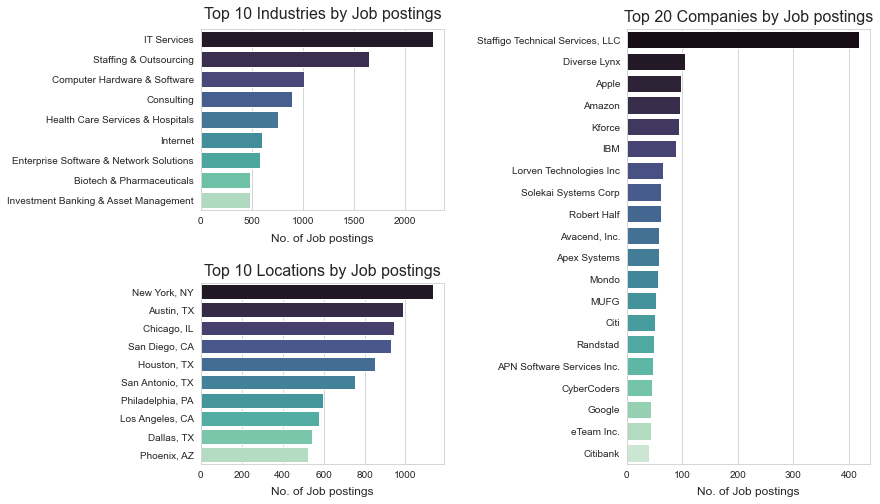

In [225]:
fig = plt.figure(figsize=(12,8))

gs = GridSpec(2, 2, figure=fig, wspace=0.75, hspace=0.4, width_ratios=[1,1])

ax1 = fig.add_subplot(gs[:, 1])
ax2 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[1, 0])

companies = listings['Company Name'].value_counts()[:20] # Top 20 companies
sns.barplot(companies.values, companies.index, palette='mako', ax=ax1)
ax1.set_title('Top 20 Companies by Job postings', size=16, pad=7)
ax1.set_xlabel('No. of Job postings', fontsize=12, labelpad=7)

industries = listings['Industry'].value_counts()[:10] # Top 10 Industries
industries = industries[industries.index!="-1"]
sns.barplot(industries.values, industries.index, palette='mako', ax=ax2)
ax2.set_title('Top 10 Industries by Job postings', size=16, pad=10)
ax2.set_xlabel('No. of Job postings', fontsize=12, labelpad=7)

locations = listings['Location'].value_counts()[:10] # Top 10 Industries
sns.barplot(locations.values, locations.index, palette='mako', ax=ax3)
ax3.set_title('Top 10 Locations by Job postings', size=16, pad=7)
ax3.set_xlabel('No. of Job postings', fontsize=12, labelpad=7)

plt.show()

## Feature Extraction from JDs

### Entities of interest: 

#### Skills
1. Programming Languages (exp- Python, SQL, R)
2. ML Frameworks (exp- Sklearn, Tensorflow, Pytorch)
3. ML Algorithms (exp- Regression, DTs, GBMs, GNNs)
4. Visualization Libraries (exp- Matplotlib, Seaborn)
5. Cloud Platforms (exp- AWS, Azure, GCP)
6. Databases (exp- MySQL, MongoDB)
7. BI Tools (exp- Tableau, PowerBI)

#### Job Requirements
1. Years of experience
2. Degree (Bachelor's, Master's, PhD)

#### To Do: NER model for skills extraction (so that we are not limited by our list of skills)
https://arxiv.org/pdf/2101.11431.pdf